In [1]:
import pandas as pd
import numpy as np

EXPLORATORY DATASET
Movies Dataset

In [2]:
df1 = pd.read_csv("/content/movies.csv")

In [3]:
print('Number of Data Points:', len(df1.iloc[:, 1]))
print('Number of Features:', len(df1.iloc[1, :]))
print(f'There are {len(df1.iloc[1, :])} Feature Columns in the Dataset, namely:')
print('Feature Columns:', df1.columns.tolist()[:])
pd.options.display.max_columns = None
df1.head()


Number of Data Points: 62423
Number of Features: 3
There are 3 Feature Columns in the Dataset, namely:
Feature Columns: ['movieId', 'title', 'genres']


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [5]:
import re

def clean_title(title):
    return re.sub("[^a-zA-Z0-9 ]", "", title)

In [6]:
# Remove special characters from the movie title
df1['title'] = df1['title'].apply(clean_title)

# Split genres using the '|' separator
df1['genres'] = df1['genres'].str.split('|')

# Update movies_data
movies_data = df1[['movieId', 'title', 'genres']]

# Get unique genres from all movies
unique_genres = pd.Series([genre for genres_list in movies_data['genres'] for genre in genres_list]).unique()

# Output the result
print(movies_data.head())


   movieId                             title  \
0        1                    Toy Story 1995   
1        2                      Jumanji 1995   
2        3             Grumpier Old Men 1995   
3        4            Waiting to Exhale 1995   
4        5  Father of the Bride Part II 1995   

                                              genres  
0  [Adventure, Animation, Children, Comedy, Fantasy]  
1                     [Adventure, Children, Fantasy]  
2                                  [Comedy, Romance]  
3                           [Comedy, Drama, Romance]  
4                                           [Comedy]  


In [7]:
print(f"There are {movies_data['title'].nunique()} movie titles.")
print(f"There are {len(unique_genres)} movie genres.")
print("Movie genres:", unique_genres)


There are 62298 movie titles.
There are 20 movie genres.
Movie genres: ['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'IMAX'
 'Documentary' 'War' 'Musical' 'Western' 'Film-Noir' '(no genres listed)']


In [8]:
# Check the number of rows with '(no genres listed)'
no_genres_count = movies_data[movies_data['genres'].apply(lambda x: '(no genres listed)' in x)].shape[0]
print(f"There are {no_genres_count} movies without a genre.")

# Remove rows with '(no genres listed)'
movies_data = movies_data[~movies_data['genres'].apply(lambda x: '(no genres listed)' in x)]

# Update the unique genre list
unique_genres = pd.Series([genre for genres_list in movies_data['genres'] for genre in genres_list]).unique()

# Display results after removal
print(f"After removal, there are {movies_data['title'].nunique()} movie titles.")
print(f"There are {len(unique_genres)} movie genres after the update.")
print("Movie genres:", unique_genres)


There are 5062 movies without a genre.
After removal, there are 57264 movie titles.
There are 19 movie genres after the update.
Movie genres: ['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'IMAX'
 'Documentary' 'War' 'Musical' 'Western' 'Film-Noir']


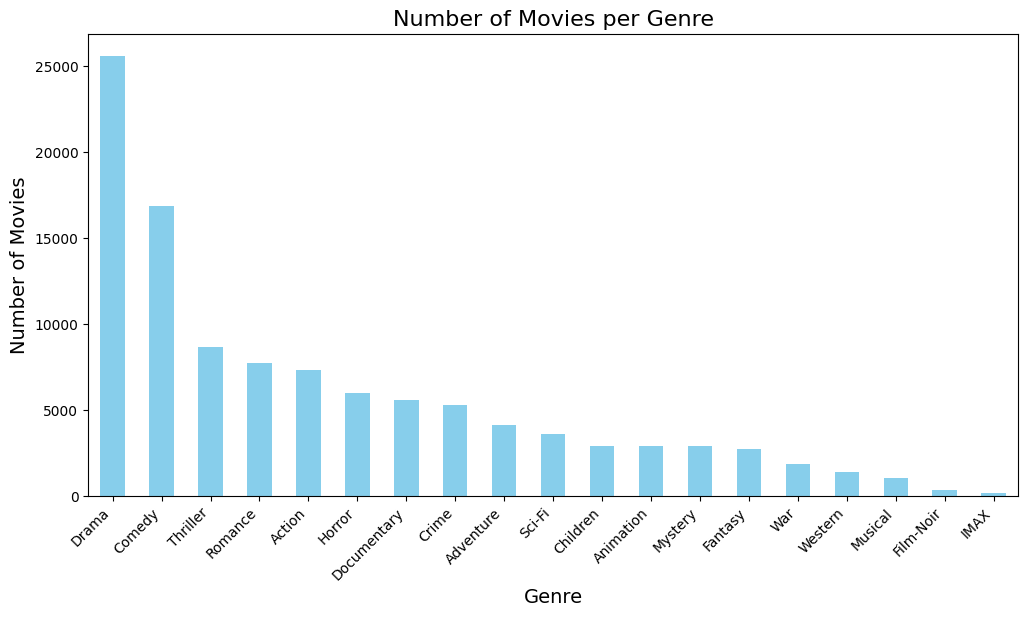

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of movies per genre
genre_counts = pd.Series([genre for genres_list in movies_data['genres'] for genre in genres_list]).value_counts()

# Plot the genre distribution
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies per Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()


In [10]:
df2 = pd.read_csv("/content/ratings.csv")

In [11]:
print('Total Data:', len(df2.iloc[:, 1]))
print('Total Features:', len(df2.iloc[1, :]))
print(f'There are {len(df2.iloc[1, :])} feature columns in the dataset:')
print('Feature Columns:', df2.columns.tolist())

# Display all columns in the output
pd.options.display.max_columns = None

# Show the first few rows of the dataset
df2.head()


Total Data: 10501073
Total Features: 4
There are 4 feature columns in the dataset:
Feature Columns: ['userId', 'movieId', 'rating', 'timestamp']


,userId,movieId,rating,timestamp
0,1,296,5.0,1.147880e+09
1,1,306,3.5,1.147869e+09
2,1,307,5.0,1.147869e+09
3,1,665,5.0,1.147879e+09
4,1,899,3.5,1.147869e+09


In [12]:
# Drop timestamp column

ratings_data = df2.drop(['timestamp'], axis=1)
print(ratings_data.head())

   userId  movieId  rating
0       1      296     5.0
1       1      306     3.5
2       1      307     5.0
3       1      665     5.0
4       1      899     3.5


In [13]:
# Check for missing values
print("Number of Missing Values per Column:")
print(df2.isnull().sum())

# Check for duplicate data
print("\nNumber of Duplicate Rows:")
print(df2.duplicated().sum())


Number of Missing Values per Column:
userId       0
movieId      0
rating       0
timestamp    1
dtype: int64

Number of Duplicate Rows:
0


In [14]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10501073 entries, 0 to 10501072
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   rating   float64
dtypes: float64(1), int64(2)
memory usage: 240.4 MB


In [ ]:
# Rating distribution
print("Rating Distribution:")
print(df2['rating'].value_counts())

# Average rating per movie
print("\nAverage Rating per Movie:")
print(df2.groupby('movieId')['rating'].mean().head())

# Average rating per user
print("\nAverage Rating per User:")
print(df2.groupby('userId')['rating'].mean().head())


Rating Distribution:
rating
4.0    1035948
3.0     755009
5.0     568443
3.5     493810
4.5     346461
2.0     253861
2.5     195835
1.0     120495
1.5      63314
0.5      60781
Name: count, dtype: int64

Average Rating per Movie:
movieId
1.0    3.897564
2.0    3.259891
3.0    3.138889
4.0    2.914729
5.0    3.097648
Name: rating, dtype: float64

Average Rating per User:
userId
1    3.814286
2    3.630435
3    3.697409
4    3.378099
5    3.752475
Name: rating, dtype: float64


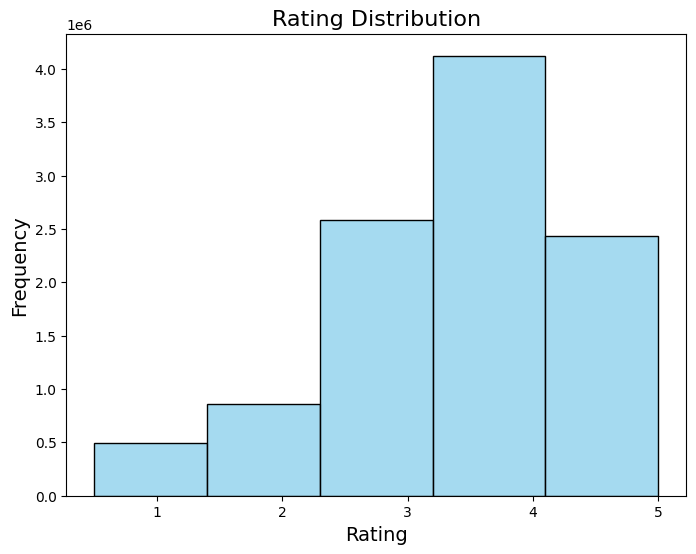

In [15]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df2['rating'], bins=5, kde=False, color='skyblue')
plt.title('Rating Distribution', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


In [16]:
combined_data = ratings_data.merge(movies_data, on='movieId')
print(combined_data.head())

   userId  movieId  rating                                       title  \
0       1      296     5.0                           Pulp Fiction 1994   
1       1      306     3.5  Three Colors Red Trois couleurs Rouge 1994   
2       1      307     5.0  Three Colors Blue Trois couleurs Bleu 1993   
3       1      665     5.0                            Underground 1995   
4       1      899     3.5                     Singin in the Rain 1952   

                             genres  
0  [Comedy, Crime, Drama, Thriller]  
1                           [Drama]  
2                           [Drama]  
3              [Comedy, Drama, War]  
4        [Comedy, Musical, Romance]  


Exploration Dataset

In [17]:
# Average Rating per Movie
avg_ratings_per_movie = combined_data.groupby('title')['rating'].mean().sort_values(ascending=False)

print("Top 10 Movies with the Highest Average Ratings:")
print(avg_ratings_per_movie.head(10))


Top 10 Movies with the Highest Average Ratings:
title
Top of the World 1998                                  5.0
Top Secret Rosies The Female Computers of WWII 2009    5.0
Nancy Drew Detective 1938                              5.0
Nancy Drew Trouble Shooter 1939                        5.0
Interrupted Melody 1955                                5.0
Tosun Pasha 1976                                       5.0
The Fall of 55 2006                                    5.0
The End of a Mystery 2003                              5.0
The Scavengers 1970                                    5.0
Casualties 1997                                        5.0
Name: rating, dtype: float64


In [18]:
# Count of Ratings per Movie
movie_rating_counts = combined_data.groupby('title')['rating'].count().sort_values(ascending=False)

print("Top 10 Movies with the Most Ratings:")
print(movie_rating_counts.head(10))


Top 10 Movies with the Most Ratings:
title
Forrest Gump 1994                        34265
Shawshank Redemption The 1994            34063
Pulp Fiction 1994                        33365
Silence of the Lambs The 1991            31054
Matrix The 1999                          30508
Star Wars Episode IV  A New Hope 1977    28647
Jurassic Park 1993                       26856
Schindlers List 1993                     25264
Braveheart 1995                          24742
Fight Club 1999                          24668
Name: rating, dtype: int64


In [19]:
# Separating Genre
exploded_data = combined_data.explode('genres')

# Counting the Number of Users Who Rated Each Genre
users_per_genre = exploded_data.groupby('genres')['userId'].nunique()

# Average Rating for Each Genre
avg_rating_per_genre = exploded_data.groupby('genres')['rating'].mean()

# Find the Top 3 Movies Based on Average Rating in Each Genre
top_movies_per_genre = (
    exploded_data.groupby(['genres', 'title'])['rating']
    .mean()
    .reset_index()
    .sort_values(['genres', 'rating'], ascending=[True, False])
    .groupby('genres')
    .head(3)
)

print("Number of Users Who Rated Each Genre:")
print(users_per_genre)
print("\nAverage Rating per Genre:")
print(avg_rating_per_genre)
print("\nTop 3 Movies in Each Genre:")
print(top_movies_per_genre)


Number of Users Who Rated Each Genre:
genres
Action         67915
Adventure      67846
Animation      58847
Children       62217
Comedy         68087
Crime          67440
Documentary    25268
Drama          68136
Fantasy        65764
Film-Noir      28356
Horror         59253
IMAX           49910
Musical        52810
Mystery        63850
Romance        67556
Sci-Fi         67134
Thriller       67912
War            61608
Western        46043
Name: userId, dtype: int64

Average Rating per Genre:
genres
Action         3.465340
Adventure      3.515609
Animation      3.608721
Children       3.427744
Comedy         3.420002
Crime          3.684400
Documentary    3.699512
Drama          3.675537
Fantasy        3.508717
Film-Noir      3.925857
Horror         3.282875
IMAX           3.603055
Musical        3.553581
Mystery        3.667579
Romance        3.538902
Sci-Fi         3.474548
Thriller       3.520683
War            3.790145
Western        3.582881
Name: rating, dtype: float64

Top 3 Mov

TF-IDF Model Creation

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer_title = TfidfVectorizer(ngram_range=(1,2))

tfidf_title = vectorizer_title.fit_transform(movies_data['title'])

def search_by_title(title):
    title = clean_title(title)
    query_vec = vectorizer_title.transform([title])
    similarity = cosine_similarity(query_vec, tfidf_title).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = movies_data.iloc[indices][::-1]
    return results

movie_results = search_by_title("Saw")
print(movie_results)

       movieId         title                       genres
8242      8957      Saw 2004  [Horror, Mystery, Thriller]
12789    63436    Saw V 2008    [Crime, Horror, Thriller]
35780   148671      Saw 2003              [Crime, Horror]
10338    39446   Saw II 2005           [Horror, Thriller]
11173    48877  Saw III 2006    [Crime, Horror, Thriller]


Use TF-IDF to convert movie titles into vectors, then compute cosine similarity to find the 5 most similar titles

In [22]:
def search_by_title(title):
    title = clean_title(title)
    query_vec = vectorizer_title.transform([title])
    similarity = cosine_similarity(query_vec, tfidf_title).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = movies_data.iloc[indices][::-1]
    return results

movie_results = search_by_title("Spiderman")
print(movie_results)

       movieId                         title  \
11561    52722              SpiderMan 3 2007   
7923      8636              SpiderMan 2 2004   
5241      5349                SpiderMan 2002   
18241    95510    Amazing SpiderMan The 2012   
21454   110553  The Amazing SpiderMan 2 2014   

                                            genres  
11561  [Action, Adventure, Sci-Fi, Thriller, IMAX]  
7923             [Action, Adventure, Sci-Fi, IMAX]  
5241         [Action, Adventure, Sci-Fi, Thriller]  
18241            [Action, Adventure, Sci-Fi, IMAX]  
21454                       [Action, Sci-Fi, IMAX]  


Find movies with similar genres

In [24]:
vectorizer_genres = TfidfVectorizer(ngram_range=(1,2))

# Combine genre list into a string
movies_data['genres_text'] = movies_data['genres'].apply(lambda x: ' '.join(x))

# Fit and transform genres using TF-IDF
tfidf_genres = vectorizer_genres.fit_transform(movies_data['genres_text'])

def search_similar_genres(genres):
    query_vec = vectorizer_genres.transform([genres])  # Transform input genres into vector
    similarity = cosine_similarity(query_vec, tfidf_genres).flatten()  # Compute cosine similarity
    indices = np.argpartition(similarity, -10)[-10:]  # Get indices of top 10 similar movies
    results = movies_data.iloc[indices][::-1]  # Retrieve and return matching movies
    return results

gen = 'Horror'
print(search_similar_genres(gen))


       movieId                                       title    genres  \
19038    99222                           Silent Night 2012  [Horror]   
17179    90252        Devil Times Five aka Peopletoys 1974  [Horror]   
22240   114044                              Honeymoon 2014  [Horror]   
22245   114064                         Pharaohs Curse 1957  [Horror]   
49906   179867                            LiveIn Fear 2014  [Horror]   
24058   120460                    Ghosts of Goldfield 2007  [Horror]   
1078      1105  Children of the Corn IV The Gathering 1996  [Horror]   
40523   159650                          Decadent Evil 2005  [Horror]   
40525   159654                            Knock Knock 2007  [Horror]   
22252   114085                 Return to Salems Lot A 1987  [Horror]   

      genres_text  
19038      Horror  
17179      Horror  
22240      Horror  
22245      Horror  
49906      Horror  
24058      Horror  
1078       Horror  
40523      Horror  
40525      Horror  
22252  

In [25]:
def scores_calculator(movie_id):
    # Filter data for similar users
    similar_users = combined_data.loc[
        (combined_data['movieId'] == movie_id) & (combined_data['rating'] >= 4), 'userId'
    ].unique()

    # Get recommendations based on similar users
    similar_user_recs = combined_data.loc[
        (combined_data['userId'].isin(similar_users)) & (combined_data['rating'] >= 4), 'movieId'
    ].value_counts(normalize=True)

    # Get recommendations based on all users
    all_user_recs = combined_data.loc[
        combined_data['movieId'].isin(similar_user_recs.index) & (combined_data['rating'] >= 4)
    ]
    all_user_recs = all_user_recs['movieId'].value_counts(normalize=True)

    # Filter genre from the selected movie
    selected_genres = combined_data.loc[combined_data['movieId'] == movie_id, 'genres'].iloc[0]
    if isinstance(selected_genres, list):
        selected_genres = " ".join(selected_genres)

    # Find movies with similar genres
    movies_with_similar_genres = search_similar_genres(selected_genres)
    similar_genre_ids = movies_with_similar_genres['movieId']

    # Adjust scores based on similar genres
    similar_user_recs.loc[similar_user_recs.index.isin(similar_genre_ids)] *= 1.5
    all_user_recs.loc[all_user_recs.index.isin(similar_genre_ids)] *= 0.9

    # Combine scores and calculate ranking
    scores = pd.DataFrame({
        'similar': similar_user_recs,
        'all': all_user_recs
    }).fillna(0)

    # Avoid division by zero
    scores['score'] = np.where(scores['all'] > 0, scores['similar'] / scores['all'], 0)

    # Sort by highest score
    return scores.sort_values('score', ascending=False)

scores_calculator(3114)


,similar,all,score
movieId,,,
181601,3.531683e-06,5.195272e-07,6.797879
115875,1.294950e-05,1.904933e-06,6.797879
115879,5.886139e-06,1.039054e-06,5.664899
31892,7.848185e-07,1.924175e-07,4.078727
142236,7.848185e-07,1.924175e-07,4.078727
...,...,...,...
630,7.848185e-07,5.772524e-06,0.135958
554,1.569637e-06,1.231472e-05,0.127460
460,7.848185e-07,6.349777e-06,0.123598


In [28]:
def recommendation_results(user_input, title=0):
    # user_input = clean_title(user_input)
    title_candidates = search_by_title(user_input)
    movie_id = title_candidates.iloc[title]['movieId']
    scores = scores_calculator(movie_id)
    results = scores.head(10).merge(movies_data, left_index=True, right_on='movieId')[['title', 'score', 'genres']]
    resutls = results.rename(columns={'title': 'title', 'genres': 'genres'}, inplace=True)
    return results

user_input = "The nun"
print("Here a similar movies: ")
for i in range(5):
    print(i, ": ", search_by_title(user_input)['title'].iloc[i])

title = 0
print("Recommendation_results: ")
print(recommendation_results(user_input))

Here a similar movies: 
0 :  The Nun 2018
1 :  The Nun 2013
2 :  The Nun 2007
3 :  Curse of the Nun 2018
4 :  The Nun and the Devil 1973
Recommendation_results: 
                                           title       score  \
57922  Mazinger Z vs The Great Dark General 1974  710.332728   
62106                             Countdown 2019  710.332728   
57921                Mazinger Z vs Devilman 1973  710.332728   
48841                   The Valdemar Legacy 2010  710.332728   
48519                           The Watcher 2016  710.332728   
48991                           Baby Shower 2011  710.332728   
14637    Three aka 3 Extremes II Saam gaang 2002  710.332728   
52166                  I Am Elizabeth Smart 2017  710.332728   
51215       3801 Lancaster American Tragedy 2015  710.332728   
49500                       MurderSetPieces 2004  710.332728   

                               genres  
57922  [Action, Adventure, Animation]  
62106              [Horror, Thriller]  
57921  [Actio